# Using Multiple Correspondence Analysis (MCA) on ADNI Dataset

## Some explanation:

As per https://en.wikipedia.org/wiki/Multiple_correspondence_analysis, we can use MCA when we have a large set of categorical variables.
In our case:
        we have categorical (in the form of 54 SNPs - boolean) making up the genetic data.

"MCA can be viewed as an extension of simple correspondence analysis (CA) in that it is applicable to a large set of categorical variables."

## Importing Stuff:

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from prince.prince.mca import MCA
import seaborn as sns

## Reading the Dataset:

In [122]:
unique = pd.read_pickle("./DATA/Linearly_Transformed_Unique_Dataset.pkl")
print(unique.shape)
unique.head(15)

(1302, 209)


,PTID,MRID,Date,Age,Sex,DLICV_baseline,APOE4_Alleles,APOE_Genotype,Diagnosis_nearest_2.0,MUSE_Volume_4,...,rs111278892,rs3752246,rs4147929,rs41289512,rs3865444,rs6024870,rs6014724,rs7274581,rs429358,Diagnosis_nearest_2.0_cat
0,002_S_0295,002_S_0295_2006-04-18,2006-04-18,84.742466,0,1485405.375,1.0,E3/E4,CN,-401.428503,...,1,1,1,0,0,0,0,0,1,0
9,002_S_0413,002_S_0413_2006-05-02,2006-05-02,76.283562,1,1364116.000,0.0,E3/E3,CN,596.355045,...,0,1,1,0,1,0,0,0,0,0
24,002_S_0559,002_S_0559_2006-05-23,2006-05-23,79.223288,0,1570479.625,1.0,E3/E4,CN,224.874560,...,0,0,0,0,1,0,0,0,0,0
31,002_S_0619,002_S_0619_2006-06-01,2006-06-01,77.447945,0,1859348.250,2.0,E4/E4,Dementia,2633.277779,...,0,0,0,1,1,0,0,0,2,1
45,002_S_0729,002_S_0729_2006-07-17,2006-07-17,65.056164,1,1166961.750,1.0,E3/E4,MCI,256.289641,...,0,0,0,1,1,0,0,0,1,2
64,002_S_0816,002_S_0816_2006-08-30,2006-08-30,70.767123,0,1444128.125,2.0,E4/E4,Dementia,-126.260419,...,0,0,0,0,1,0,0,0,2,1
69,002_S_0938,002_S_0938_2006-10-05,2006-10-05,82.167123,1,1309685.000,0.0,E3/E3,Dementia,200.102369,...,0,1,1,0,1,0,0,0,0,1
74,002_S_0954,002_S_0954_2006-10-10,2006-10-10,69.198630,1,1075661.500,1.0,E3/E4,MCI,-60.539913,...,2,1,1,0,1,0,0,0,1,2
81,002_S_0955,002_S_0955_2006-10-11,2006-10-11,78.161644,1,1363607.000,1.0,E3/E4,Dementia,1058.028132,...,1,0,0,0,1,0,0,0,1,1
84,002_S_1018,002_S_1018_2006-11-29,2006-11-29,70.658904,1,1355603.000,0.0,E3/E3,Dementia,-485.048304,...,1,1,1,0,0,0,0,0,0,1


## Employ Prince MCA:

### Try with 2 components:

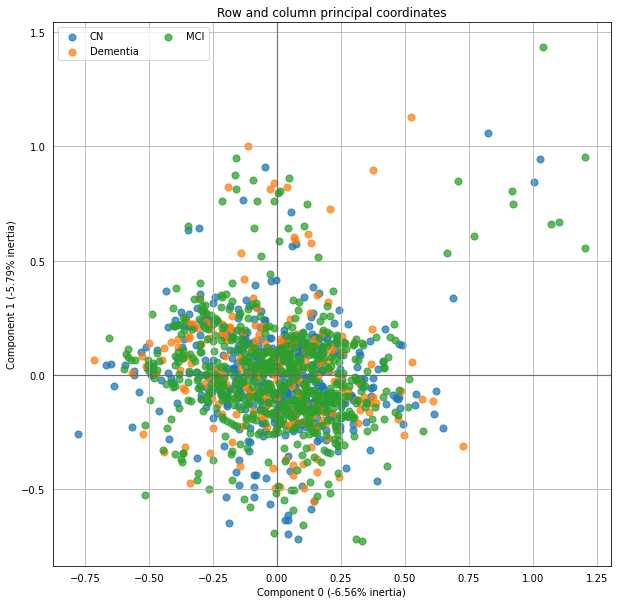

In [123]:
# First get the data to train on:
l = list(unique.columns)
columns_to_train_on = l[l.index("rs4575098"):l.index("rs429358")+1]

# The prince MCA algorithm needs string type for categorical data:
X = unique[columns_to_train_on].astype("string")

# Get the labels after
Y = unique["Diagnosis_nearest_2.0"].astype("string")

# Number of components is the number to which the dimension will be reduced
# Default checks input, copies dataset
# Needs to be in pandas or np.ndarray format
mca = MCA(n_components=2, n_iter=30) # 54 -> 2
mca.fit(X,y=Y)

# Make a visualization using the inherited method from CA:
ax = mca.plot_coordinates(X, ax=None, figsize=(10, 10), x_component=0, y_component=1, show_row_points=True, 
                          row_points_size=50, row_points_alpha=0.75, row_groups=list(Y), show_row_labels=False,
                          show_column_points=False, column_points_size=50, show_column_labels=False,
                          legend_n_cols=2)
plt.show()

### Try with 4 components:

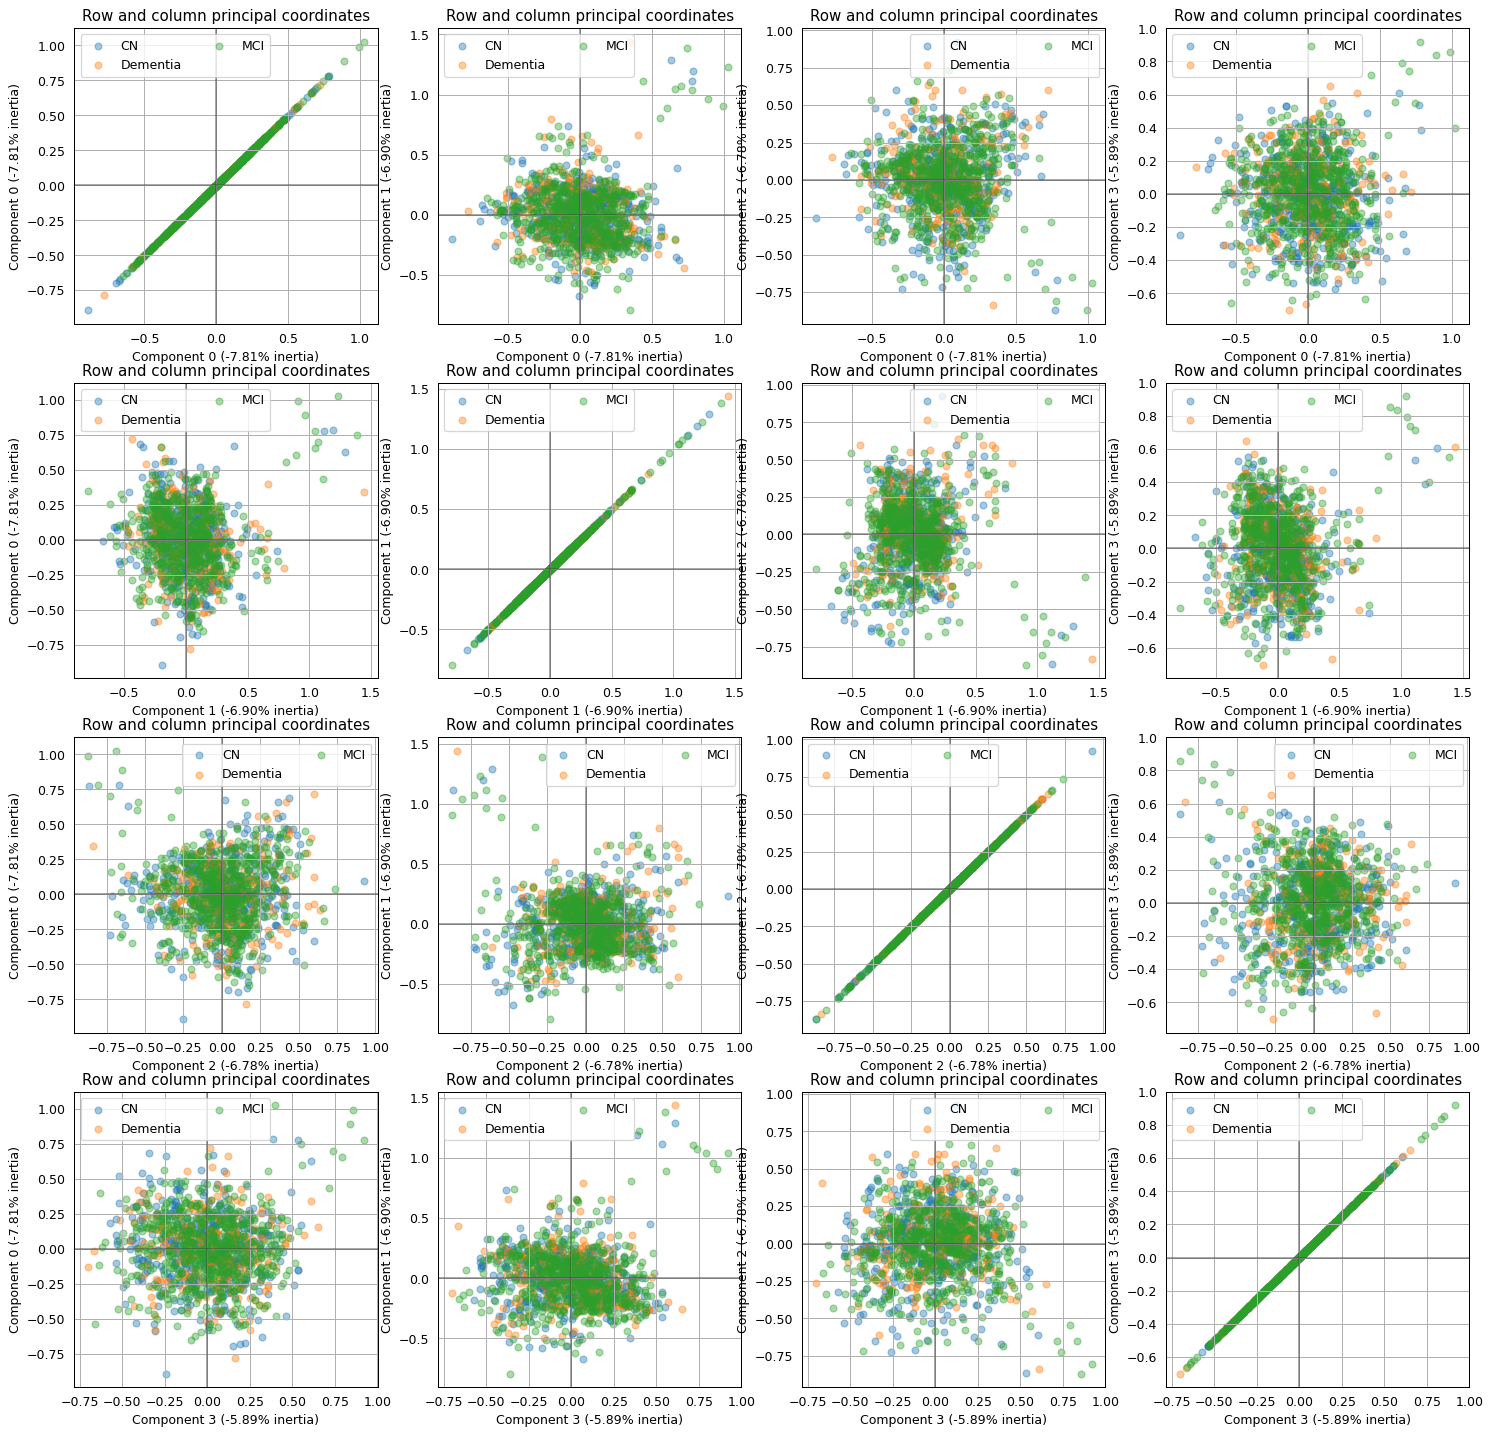

In [124]:
# First get the data to train on:
l = list(unique.columns)
columns_to_train_on = l[l.index("rs4575098"):l.index("rs429358")+1]

# The prince MCA algorithm needs string type for categorical data:
X = unique[columns_to_train_on].astype("string")

# Get the labels after
Y = unique["Diagnosis_nearest_2.0"].astype("string")

# Number of components is the number to which the dimension will be reduced
# Default checks input, copies dataset
# Needs to be in pandas or np.ndarray format
mca = MCA(n_components=4, n_iter=3) # 54 -> 2
mca.fit(X,y=Y)

# Make a visualization using the inherited method from CA:
fig, ax_arr = plt.subplots(nrows=4,ncols=4,figsize=(20,20), dpi=90)

combinations = [(x,y) for x in range(4) for y in range(4)]
for x,y in combinations:
    mca.plot_coordinates(X, ax=ax_arr[x,y], figsize=(8, 8), x_component=x, y_component=y, show_row_points=True, 
                         row_points_size=30, row_points_alpha=0.4, row_groups=list(Y), show_row_labels=False,
                         show_column_points=False, column_points_size=30, show_column_labels=False,
                         legend_n_cols=2)
plt.show()

### Elaboration:

In [173]:
n_comps = 10
mca = MCA(n_components=n_comps, n_iter=3) # 54 -> n_comps
mca.fit(X,y=Y)

print("########################################################")
# The inertia for a component describes the amount of variation the component explains. 
# The inertia for a column describes how much the values for that category differ from 
# the expected value under the assumption that none of the categorical variables are 
# correlated. 
print("Total Inertia: ", mca.total_inertia_)
print("Sum of eigenv: ", mca.eigenvalues_.sum())
print("Expl inert sum:", sum(mca.explained_inertia_))
print("########################################################")
for i in range(n_comps):
    print("Explained Inertia for component %d: " %i, mca.explained_inertia_[i])
print("########################################################")
print("Number of Eigenvalues: ", len(mca.eigenvalues_))
print(mca.eigenvalues_)
print("########################################################")
print("Explained variance by component:")
for i in range(n_comps):
    print("Explained Variance for component ", i, ": ", round(100*mca.eigenvalues_[i]/sum(mca.eigenvalues_),2),"%",sep="")
print("########################################################")
print("Ratios between explained inertia and explained variance:")
print(mca.explained_inertia_[0]/(mca.eigenvalues_[0]/sum(mca.eigenvalues_)))
print(mca.explained_inertia_[1]/(mca.eigenvalues_[1]/sum(mca.eigenvalues_)))
print(mca.explained_inertia_[2]/(mca.eigenvalues_[2]/sum(mca.eigenvalues_)))

########################################################
Total Inertia:  0.013380856011271345
Sum of eigenv:  0.013380856011271345
Expl inert sum: -1.7474397295524846
########################################################
Explained Inertia for component 0:  -0.2460707889219971
Explained Inertia for component 1:  -0.2222334091394499
Explained Inertia for component 2:  -0.21098400771337433
Explained Inertia for component 3:  -0.18757881758268322
Explained Inertia for component 4:  -0.17697737736441968
Explained Inertia for component 5:  -0.16723407076041177
Explained Inertia for component 6:  -0.16004750853688804
Explained Inertia for component 7:  -0.13927383211791936
Explained Inertia for component 8:  -0.1309047300359871
Explained Inertia for component 9:  -0.10613518737935379
########################################################
Number of Eigenvalues:  10
[0.00188426 0.00170173 0.00161559 0.00143637 0.00135519 0.00128058
 0.00122555 0.00106648 0.00100239 0.00081272]
############

In [174]:
transformed_genetic_data = mca.transform(X)
columns = ["Component " + str(x) for x in list(transformed_genetic_data.columns)]
transformed_genetic_data.columns = columns
print(transformed_genetic_data.shape)
transformed_genetic_data.head()

(1302, 10)


,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9
0,0.113496,0.085237,0.125954,-0.053222,-0.004048,-0.025359,0.095221,0.103642,-0.227617,-0.052953
1,0.020448,-0.190399,-0.110343,0.135433,-0.009643,0.132597,-0.057125,-0.420775,-0.225029,-0.105150
2,-0.024506,0.122556,0.072982,-0.521003,-0.252526,0.042296,-0.048910,-0.181387,-0.237183,-0.032774
3,-0.297388,-0.109418,-0.107704,0.195749,0.293527,-0.085853,0.066857,-0.418637,-0.012810,0.090799
4,-0.071671,-0.060895,0.052970,-0.287273,-0.021964,-0.016644,-0.175152,-0.115731,-0.205967,0.023820


## Using MCA package:

########################################################
Number of Eigenvalues:  10
[0.00197957 0.00174706 0.00167377 0.00154155 0.0014934  0.0013376
 0.00126304 0.00115275 0.00108279 0.00106706]
########################################################
Explained variance by component:
Explained Variance for component 0: 13.81%
Explained Variance for component 1: 12.18%
Explained Variance for component 2: 11.67%
Explained Variance for component 3: 10.75%
Explained Variance for component 4: 10.42%
Explained Variance for component 5: 9.33%
Explained Variance for component 6: 8.81%
Explained Variance for component 7: 8.04%
Explained Variance for component 8: 7.55%
Explained Variance for component 9: 7.44%
########################################################
Inertia:
0.022674203719463524 0.014338605875380701
########################################################
Transformations:
(1302, 5)
[[ 0.02371735  0.00758166  0.03124097 -0.00260468  0.02199923]
 [ 0.01051906 -0.02912091 -0.02414

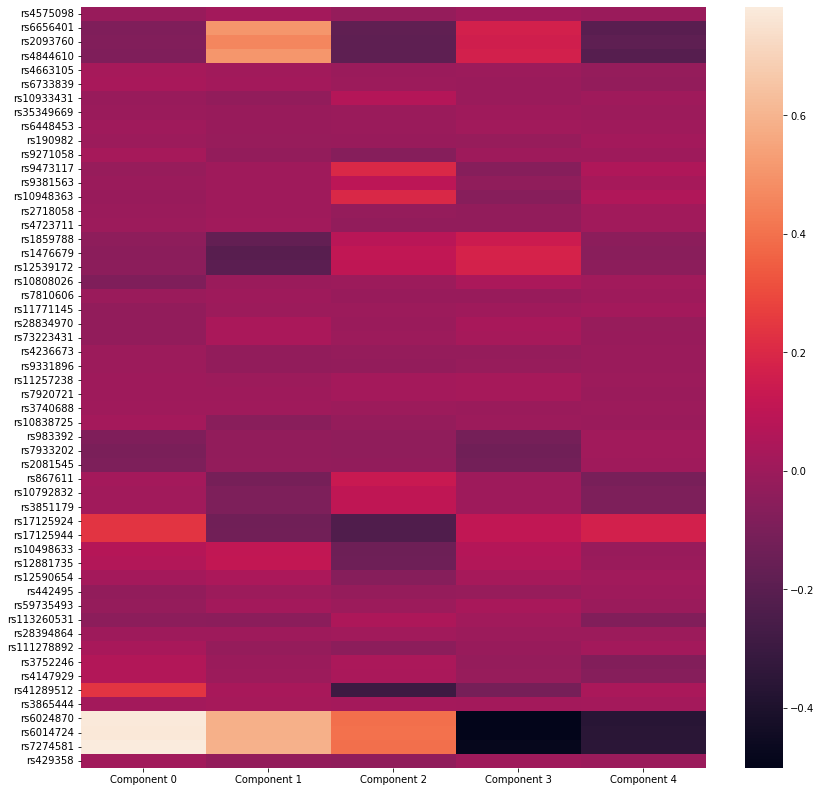

In [177]:
import mca

# Dataframe, which columns to train on, number of columns (Default = None = All), benzecri correction, 
# tolerance = threshold to set eigenvalues to 0: 
mca_df = mca.MCA(X, cols=columns_to_train_on, ncols=len(columns_to_train_on), benzecri=True, TOL=1e-3)
print("########################################################")
# eigenvalues:
print("Number of Eigenvalues: ", len(mca_df.L))
print(mca_df.L)
print("########################################################")
print("Explained variance by component:")
for i in range(len(mca_df.L)):
    print("Explained Variance for component ", i, ": ", round(100*mca_df.L[i]/sum(mca_df.L),2),"%",sep="")
print("########################################################")
# The inertia is simply the sum of the principle inertias:
print("Inertia:")
print(mca_df.inertia, mca_df.L.sum()) # If sum < inertia, raise TOL
print("########################################################")
# Projections onto the factor space:
print("Transformations:")
print(mca_df.fs_r(.5).shape)
print(mca_df.fs_r(.5)) # 1=100% => Preserve all variance
print("########################################################")
print(mca_df.fs_c(.5).shape) # (54 SNPs * 3 values)*num_of_components required to retain 0.3 of the total variance
num_of_components = mca_df.fs_c(.5).shape[1]
num_of_SNPs = 54
num_of_values = 3
column_factor_scores = mca_df.fs_c(.5).reshape((num_of_SNPs,num_of_values,num_of_components))
valued_sum_of_column_factor_scores = column_factor_scores.sum(axis=1)
print(valued_sum_of_column_factor_scores.shape)
# print(valued_sum_of_column_factor_scores)
# df_comp = pd.DataFrame(valued_sum_of_column_factor_scores, columns = columns_to_train_on)
plt.figure(figsize =(14, 14))
sns.heatmap(valued_sum_of_column_factor_scores, xticklabels=["Component "+str(i) for i in range(num_of_components)], yticklabels=columns_to_train_on)
plt.show()

## Saving the transformed features:

In [178]:
np.save("./DATA/MCA_Transformed_Genetic_data_5_components.pkl", mca_df.fs_r(.5))
np.save("./DATA/MCA_Transformed_Genetic_data_10_components.pkl", mca_df.fs_r(1))